In [5]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

# read in csv files through pandas and list comprehension
# rarse any dates pandas finds into a date/time format (first column = row indices)
dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [3]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2024-05-23,6.94
2024-05-30,7.03
2024-06-06,6.99


In [6]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2023-01-01,6.4
2023-04-01,6.3
2023-07-01,6.6


In [7]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2024-01-01,309.685
2024-02-01,311.054
2024-03-01,312.230


In [8]:
# Concatenate into one data frame
fed_data = pd.concat(dfs, axis=1)

In [9]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2024-05-23,6.94,NaN,NaN
2024-05-30,7.03,NaN,NaN
2024-06-06,6.99,NaN,NaN


In [10]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-09-01,NaN,NaN,307.288
2023-09-07,7.12,NaN,NaN
2023-09-14,7.18,NaN,NaN
2023-09-21,7.19,NaN,NaN
2023-09-28,7.31,NaN,NaN
2023-10-01,NaN,6.6,307.531
2023-10-05,7.49,NaN,NaN
2023-10-12,7.57,NaN,NaN
2023-10-19,7.63,NaN,NaN


In [11]:
# forward filling (assume that these rates will stay constant in the period they are released to fill in missing values)
fed_data = fed_data.ffill()

In [12]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2023-09-01,7.18,6.6,307.288
2023-09-07,7.12,6.6,307.288
2023-09-14,7.18,6.6,307.288
2023-09-21,7.19,6.6,307.288
2023-09-28,7.31,6.6,307.288
2023-10-01,7.31,6.6,307.531
2023-10-05,7.49,6.6,307.531
2023-10-12,7.57,6.6,307.531
2023-10-19,7.63,6.6,307.531


In [30]:
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

# read in zillow csv files
dfs = [pd.read_csv(f) for f in zillow_files]

In [31]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2024-03-02,2024-03-09,2024-03-16,2024-03-23,2024-03-30,2024-04-06,2024-04-13,2024-04-20,2024-04-27,2024-05-04
0,102001,0,United States,country,NaN,175000.0,170000.0,171488.0,168000.0,176000.0,...,347000.0,340000.0,345000.0,340000.0,350000.0,349900.0,350000.0,355000.0,353000.0,365000.0
1,394913,1,"New York, NY",msa,NY,390000.0,405000.0,404586.0,404000.0,385000.0,...,570000.0,580000.0,560000.0,550000.0,566000.0,578000.0,575000.0,580000.0,585000.0,600000.0
2,753899,2,"Los Angeles, CA",msa,CA,455000.0,460000.0,470000.0,483000.0,460000.0,...,940000.0,895000.0,925000.0,905000.0,929000.0,930000.0,975000.0,930000.0,969250.0,945000.0
3,394463,3,"Chicago, IL",msa,IL,222500.0,219950.0,220000.0,205500.0,220000.0,...,305000.0,286000.0,309000.0,303000.0,300000.0,310000.0,300000.0,320000.0,320000.0,340000.0
4,394514,4,"Dallas, TX",msa,TX,136500.0,129000.0,140290.0,137000.0,139153.0,...,385000.0,385000.0,385000.0,389000.0,400000.0,385000.0,400000.0,400000.0,388316.0,412000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,394651,259,"Greenville, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,210000.0,205000.0,228000.0,255000.0,224250.0,240000.0,188750.0,193000.0,199000.0,230000.0
187,395079,274,"Sebastian, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,410000.0,327500.0,359950.0,450000.0,420000.0,425000.0,412500.0,345000.0,380000.0,355000.0
188,394639,280,"Grand Junction, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,380000.0,385000.0,360000.0,391000.0,355000.0,439875.0,365000.0,407500.0,415450.0,343700.0
189,394685,289,"Homosassa Springs, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,280000.0,334950.0,277000.0,275000.0,265000.0,245000.0,253950.0,274450.0,275000.0,285000.0


In [32]:
# select Austin as the city and select data from column 5 and onwards
dfs = [pd.DataFrame(df.iloc[29, 5:]) for df in dfs]

In [33]:
dfs[0]

,29
2008-02-02,190300.0
2008-02-09,183000.0
2008-02-16,183250.0
2008-02-23,169875.0
2008-03-01,180000.0
...,...
2024-04-06,480000.0
2024-04-13,485000.0
2024-04-20,453500.0
2024-04-27,482500.0


In [34]:
dfs[1]

,29
1996-02-29,155919.59454
1996-03-31,152917.307557
1996-04-30,152324.513869
1996-05-31,155220.265844
1996-06-30,156995.328506
...,...
2024-01-31,451357.858301
2024-02-29,452560.902039
2024-03-31,457354.415139
2024-04-30,462274.886042


In [35]:
# loop to combine the 2 datasets
for df in dfs:
    # convert string date to actual date
    df.index = pd.to_datetime(df.index)

    # cut off dates to create common column to combine
    df["month"] = df.index.to_period("M")

In [36]:
dfs[0]

,29,month
2008-02-02,190300.0,2008-02
2008-02-09,183000.0,2008-02
2008-02-16,183250.0,2008-02
2008-02-23,169875.0,2008-02
2008-03-01,180000.0,2008-03
...,...,...
2024-04-06,480000.0,2024-04
2024-04-13,485000.0,2024-04
2024-04-20,453500.0,2024-04
2024-04-27,482500.0,2024-04


In [37]:
dfs[1]

,29,month
1996-02-29,155919.59454,1996-02
1996-03-31,152917.307557,1996-03
1996-04-30,152324.513869,1996-04
1996-05-31,155220.265844,1996-05
1996-06-30,156995.328506,1996-06
...,...,...
2024-01-31,451357.858301,2024-01
2024-02-29,452560.902039,2024-02
2024-03-31,457354.415139,2024-03
2024-04-30,462274.886042,2024-04


In [38]:
# use month column to combine data frames
price_data = dfs[0].merge(dfs[1], on="month")

In [40]:
price_data.index = dfs[0].index

In [41]:
price_data

,29_x,month,29_y
2008-02-02,190300.0,2008-02,205917.471828
2008-02-09,183000.0,2008-02,205917.471828
2008-02-16,183250.0,2008-02,205917.471828
2008-02-23,169875.0,2008-02,205917.471828
2008-03-01,180000.0,2008-03,207053.848241
...,...,...,...
2024-04-06,480000.0,2024-04,462274.886042
2024-04-13,485000.0,2024-04,462274.886042
2024-04-20,453500.0,2024-04,462274.886042
2024-04-27,482500.0,2024-04,462274.886042


In [42]:
# data cleaning
del price_data["month"]
price_data.columns = ["price", "value"]

In [43]:
price_data

,price,value
2008-02-02,190300.0,205917.471828
2008-02-09,183000.0,205917.471828
2008-02-16,183250.0,205917.471828
2008-02-23,169875.0,205917.471828
2008-03-01,180000.0,207053.848241
...,...,...
2024-04-06,480000.0,462274.886042
2024-04-13,485000.0,462274.886042
2024-04-20,453500.0,462274.886042
2024-04-27,482500.0,462274.886042


In [44]:
# merge zillow price data with federal reserve economic data
# drop rows that do not have economic indicators for
fed_data = fed_data.dropna()

In [46]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2024-02-29,6.94,6.6,311.054
2024-03-01,6.94,6.6,312.230
2024-03-07,6.88,6.6,312.230
2024-03-14,6.74,6.6,312.230
2024-03-21,6.87,6.6,312.230
2024-03-28,6.79,6.6,312.230
2024-04-01,6.79,6.6,313.207
2024-04-04,6.82,6.6,313.207
2024-04-11,6.88,6.6,313.207


In [47]:
# align fed data with federal reserve data because date is released 2 days apart
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [48]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2024-05-25,6.94,6.6,313.225
2024-06-01,7.03,6.6,313.225
2024-06-08,6.99,6.6,313.225


In [49]:
# merge with zillow data because dates are now consistent
# use the index to merge
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

In [50]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,price,value
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241
...,...,...,...,...,...
2024-04-06,6.82,6.6,313.207,480000.0,462274.886042
2024-04-13,6.88,6.6,313.207,485000.0,462274.886042
2024-04-20,7.10,6.6,313.207,453500.0,462274.886042
2024-04-27,7.17,6.6,313.207,482500.0,462274.886042


In [51]:
# rename columns
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]

In [52]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241
...,...,...,...,...,...
2024-04-06,6.82,6.6,313.207,480000.0,462274.886042
2024-04-13,6.88,6.6,313.207,485000.0,462274.886042
2024-04-20,7.10,6.6,313.207,453500.0,462274.886042
2024-04-27,7.17,6.6,313.207,482500.0,462274.886042


<Axes: >

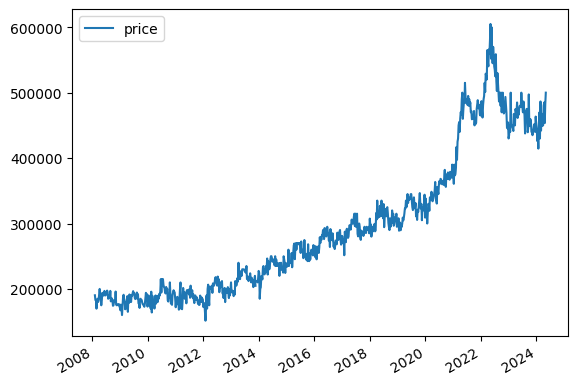

In [60]:
# data exploration (install matplotlib)
price_data.plot.line(y="price", use_index=True)

In [61]:
# take out inflation and only find increase in house prices
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100

<Axes: >

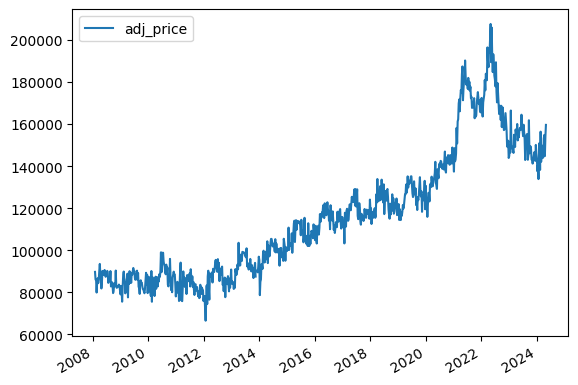

In [62]:
price_data.plot.line(y="adj_price", use_index=True)

In [82]:
# take out inflation
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100 

In [83]:
# target for machine learning
# pandas shift function grabs adjusted price from next quarter and pulls it back to the current road
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [84]:
price_data

,interest,vacancy,cpi,price,value,adj_price,next_quarter,change,adj_value
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828,89690.537012,84966.636928,0,97051.227685
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828,86041.93016,90145.347757,1,96817.1406
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828,86159.473781,88314.560797,1,96817.1406
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828,79870.890087,88286.680793,1,96817.1406
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241,84631.406715,88286.680793,1,97351.435791
...,...,...,...,...,...,...,...,...,...
2024-01-06,6.62,6.6,309.685,444500.0,451357.858301,143532.944766,None,1,145747.407301
2024-01-13,6.66,6.6,309.685,426000.0,451357.858301,137559.132667,None,1,145747.407301
2024-01-20,6.60,6.6,309.685,435000.0,451357.858301,140465.311526,None,1,145747.407301
2024-01-27,6.69,6.6,309.685,414500.0,451357.858301,133845.681903,None,1,145747.407301


In [85]:
# drop 'None' rows for now
price_data.dropna(inplace=True)

In [86]:
price_data

,interest,vacancy,cpi,price,value,adj_price,next_quarter,change,adj_value
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828,89690.537012,84966.636928,0,97051.227685
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828,86041.93016,90145.347757,1,96817.1406
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828,86159.473781,88314.560797,1,96817.1406
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828,79870.890087,88286.680793,1,96817.1406
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241,84631.406715,88286.680793,1,97351.435791
...,...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,449000.0,471340.330081,146116.997735,143532.944766,0,153387.158002
2023-10-07,7.49,6.6,307.531,450000.0,464410.655478,146326.711779,137559.132667,0,151012.631402
2023-10-14,7.57,6.6,307.531,459500.0,464410.655478,149415.83125,140465.311526,0,151012.631402
2023-10-21,7.63,6.6,307.531,455000.0,464410.655478,147952.564132,133845.681903,0,151012.631402


In [87]:
# finalize setting up target
# show if price increases or decreases
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [88]:
price_data

,interest,vacancy,cpi,price,value,adj_price,next_quarter,change,adj_value
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828,89690.537012,84966.636928,0,97051.227685
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828,86041.93016,90145.347757,1,96817.1406
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828,86159.473781,88314.560797,1,96817.1406
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828,79870.890087,88286.680793,1,96817.1406
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241,84631.406715,88286.680793,1,97351.435791
...,...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,449000.0,471340.330081,146116.997735,143532.944766,0,153387.158002
2023-10-07,7.49,6.6,307.531,450000.0,464410.655478,146326.711779,137559.132667,0,151012.631402
2023-10-14,7.57,6.6,307.531,459500.0,464410.655478,149415.83125,140465.311526,0,151012.631402
2023-10-21,7.63,6.6,307.531,455000.0,464410.655478,147952.564132,133845.681903,0,151012.631402


In [89]:
# see if number of increases and decreases in price are balanced
price_data["change"].value_counts()

change
1    421
0    379
Name: count, dtype: int64

In [90]:
# variables to use to make predictions
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

In [112]:
# create machine learning model
# random forest classifier great for being used as a basic model, pretty robust to overfitting and can pick up non-linear tendencies in data
from sklearn.ensemble import RandomForestClassifier
# how accurate is the model
from sklearn.metrics import accuracy_score
import numpy as np

# number of weeks in 5 years
START = 260
# number of weeks in 1 year
STEP = 52 

# function parameters:
# train - training set
# test - test set which we will make predictions on
# predictors - columns we will use to make predictions
# target
# returns predictions
def predict(train, test, predictors, target):
    # min samples split protects against overfitting by preventing nodes in decision tree from splitting too deeply
    # random state generates same sequence of random numbers
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)

    # pass in data
    rf.fit(train[predictors], train[target])

    # make predictions
    preds = rf.predict(test[predictors])
    return preds

# use backtesting to avoid cross validation for time series data
# avoid using future data to predict the past
# generate predictions but respecting the order of the data
def backtest(data, predictors, target):
    all_preds = []

    # start with 5 years of data and make predictions for the next year (2008-2013 -> 2014)
    # then repeat for next years (2008-2014 -> 2015)...
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))

    # concatenate into single array
    preds = np.concatenate(all_preds)
    
    # return predictions and accuracy
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [113]:
preds, accuracy = backtest(price_data, predictors, target)

In [114]:
accuracy

0.5796296296296296

In [115]:
# improve accuracy with recent trend in house prices
yearly = price_data.rolling(52, min_periods=1).mean()

In [116]:
yearly

,interest,vacancy,cpi,price,value,adj_price,next_quarter,change,adj_value,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.680000,10.100000,212.174000,190300.000000,205917.471828,89690.537012,84966.636928,0.000000,97051.227685,1.000000,1.000000,1.000000,1.000000
2008-02-09,5.675000,10.100000,212.430500,186650.000000,205917.471828,87866.233586,87555.992342,0.500000,96934.184142,0.999559,1.000000,0.989619,0.999396
2008-02-16,5.690000,10.100000,212.516000,185516.666667,205917.471828,87297.313651,87808.848494,0.666667,96895.169628,1.001464,1.000000,0.988735,0.999329
2008-02-23,5.777500,10.100000,212.558750,181606.250000,205917.471828,85440.707760,87928.306569,0.750000,96875.662371,1.012457,1.000000,0.975254,0.999346
2008-03-01,5.870000,10.100000,212.584400,181285.000000,206144.747111,85278.847551,87999.981413,0.800000,96970.817055,1.022572,1.000000,0.978684,1.000262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,6.649231,6.278846,302.272673,466521.576923,484462.773349,154352.123813,151324.855107,0.365385,160315.467136,1.162592,1.050377,0.925297,0.922870
2023-10-07,6.664423,6.290385,302.487865,466136.961538,483561.138380,154116.078443,151185.066557,0.365385,159901.551230,1.155212,1.050515,0.926372,0.922915
2023-10-14,6.681923,6.305769,302.673788,465601.384615,482659.503411,153843.008127,151005.126183,0.365385,159504.589439,1.148643,1.051271,0.927311,0.923091
2023-10-21,6.695577,6.321154,302.859712,464736.000000,481757.868442,153460.126542,150761.911825,0.365385,159107.627648,1.141577,1.051978,0.927644,0.923304


In [117]:
# find ratio between current value and and value in the previous year
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [118]:
price_data

,interest,vacancy,cpi,price,value,adj_price,next_quarter,change,adj_value,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,190300.0,205917.471828,89690.537012,84966.636928,0,97051.227685,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,183000.0,205917.471828,86041.93016,90145.347757,1,96817.1406,0.999119,1.000000,0.979238,0.998793
2008-02-16,5.72,10.1,212.687,183250.0,205917.471828,86159.473781,88314.560797,1,96817.1406,1.005272,1.000000,0.986966,0.999195
2008-02-23,6.04,10.1,212.687,169875.0,205917.471828,79870.890087,88286.680793,1,96817.1406,1.045435,1.000000,0.934811,0.999396
2008-03-01,6.24,10.1,212.687,180000.0,207053.848241,84631.406715,88286.680793,1,97351.435791,1.063032,1.000000,0.992408,1.003925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,7.31,6.6,307.288,449000.0,471340.330081,146116.997735,143532.944766,0,153387.158002,1.099375,1.051149,0.946647,0.956783
2023-10-07,7.49,6.6,307.531,450000.0,464410.655478,146326.711779,137559.132667,0,151012.631402,1.123878,1.049220,0.949458,0.94441
2023-10-14,7.57,6.6,307.531,459500.0,464410.655478,149415.83125,140465.311526,0,151012.631402,1.132907,1.046661,0.971223,0.94676
2023-10-21,7.63,6.6,307.531,455000.0,464410.655478,147952.564132,133845.681903,0,151012.631402,1.139558,1.044113,0.964111,0.949123


In [123]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [124]:
accuracy

0.5833333333333334

In [125]:
# run diagnostics
# compares predicted values to the actual values
pred_match = (preds == price_data[target].iloc[START:])

In [127]:
# assign true and false to a color to plot
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

/var/folders/4w/4c2280912vlg5mh66gzj3c840000gn/T/ipykernel_77655/1216876459.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'green' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  pred_match[pred_match == True] = "green"


<Axes: xlabel='index', ylabel='adj_price'>

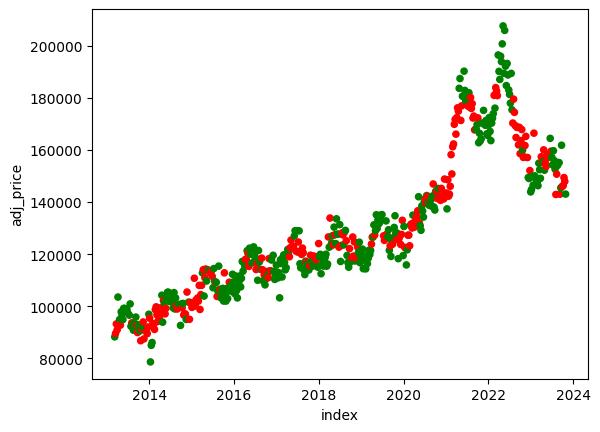

In [130]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

# turns column into x-axis and adj_price as y-axis
plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [131]:
# check which columns are most important to the model
from sklearn.inspection import permutation_importance

# initialize RFC
rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

# checks to see which variables are most important to the model
result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [132]:
result["importances_mean"]

array([0.202375, 0.140875, 0.313375, 0.257625])

In [133]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']